In [1]:
%reset -s -f

In [2]:
import numpyro
import jax
import jax.numpy as np
import jax.random as random
import numpyro.distributions as dist
from numpyro import infer, optim, handlers
from numpyro.infer import NUTS, MCMC, HMC

import numpy as onp
import seaborn as sns

In [3]:
def softplus(x):
    return np.log(1 + np.exp(x))

In [4]:
n = 500
a = 2
b = 4
c = 8

In [5]:
x = dist.Normal(0, 0.34).sample(random.PRNGKey(0), (n,))

In [6]:
link = softplus(a * x + b)

In [7]:
y = dist.Exponential(rate = 1 / link).sample(random.PRNGKey(1))

In [8]:
censor_label = np.array(y > c, dtype=np.float32)

In [9]:
censor_label

DeviceArray([0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
             0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
             0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
             0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
             0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
             0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
             0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0.,
             0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
             0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
             0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
             0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
             0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
             0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
             0., 1., 0., 0., 0., 0., 0., 0., 0., 0.

In [10]:
y_obs = y.clip(a_max=c)

In [11]:
y_obs

DeviceArray([4.3776464e+00, 4.6362615e+00, 8.0000000e+00, 1.5325994e+00,
             1.0261387e+00, 8.0000000e+00, 3.1019723e+00, 5.3426857e+00,
             4.7022119e+00, 5.5207953e+00, 1.4228680e+00, 8.0000000e+00,
             8.0000000e+00, 5.7343321e+00, 5.8120811e-01, 1.7148134e+00,
             4.6875095e+00, 3.6019182e+00, 3.5998695e+00, 1.4522029e+00,
             1.4926254e+00, 5.2420735e-01, 6.3451938e-02, 4.0326279e-01,
             2.4711673e+00, 1.9222857e+00, 7.8271353e-01, 6.7459118e-01,
             1.7220433e+00, 4.4319123e-01, 3.3171782e-01, 2.7299571e-01,
             2.8046623e-01, 6.0104675e+00, 4.0208688e+00, 1.0217892e+00,
             6.2720098e+00, 3.7831717e+00, 3.8560040e+00, 3.7828767e+00,
             2.1056378e+00, 3.6766067e+00, 1.7647116e+00, 2.8840001e+00,
             2.7884123e-01, 4.3340962e-02, 4.1297565e+00, 7.7971417e-01,
             3.8573990e+00, 8.0000000e+00, 2.6359487e+00, 8.0000000e+00,
             2.7234886e+00, 2.9648626e+00, 2.002618

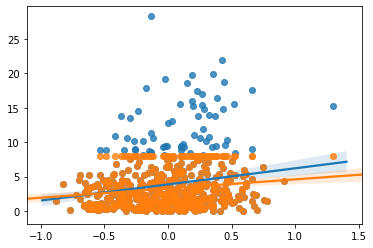

In [12]:
sns.regplot(x, y)
sns.regplot(x, y_obs);

In [13]:
def Exp_Cdf(x, rate=1.0):
    return 1 - np.exp(-rate * x)


def model(x, y, censor_label):
    a_model = numpyro.sample('a_model', dist.Normal(0., 10.))
    b_model = numpyro.sample('b_model', dist.Normal(0., 10.))
    
    link = softplus(a_model * x + b_model)
    rates = 1/link
    
    with numpyro.plate("data", len(x)):
        y_hidden_dist = dist.Exponential(rates)
        
        

SyntaxError: invalid syntax (<ipython-input-13-78470468c950>, line 12)

In [ ]:
rng_key = random.PRNGKey(3)
rng_key, rng_key_ = random.split(rng_key)

# Run NUTS.
kernel = NUTS(model)
mcmc = MCMC(kernel, 10000, 50)
mcmc.run(rng_key_, x=x, y=y, censor_label=censor_label)

  0%|          | 0/10050 [00:00<?, ?it/s]

In [ ]:
mcmc.print_summary()
samples = mcmc.get_samples()